## About

This plot is a [ridgeline](https://python-graph-gallery.com/ridgeline/). It is a way to display the distribution of a **numerical variable for several groups**. 

As a teaser, here is the plot we’re gonna try building:

![scatterplot](https://github.com/holtzy/The-Python-Graph-Gallery/blob/master/static/graph/web-ridgeline-by-text.png?raw=true)

## Libraries

For creating this chart, we will need a whole bunch of libraries!

- [matplotlib](https://python-graph-gallery.com/matplotlib/): to customize the appearance of the chart
- [seaborn](https://python-graph-gallery.com/seaborn/): to create the chart
- [pandas](https://python-graph-gallery.com/pandas/): to handle the data

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Dataset

The data can be accessed using the **url below**. 

In [39]:
rent_path = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-07-05/rent.csv'
rent_path = '../../static/data/rent.csv'
rent = pd.read_csv(rent_path)

rent_words_path = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-07-05/rent_title_words.csv'
rent_words_path = '../../static/data/rent_title_words.csv'
rent_words = pd.read_csv(rent_words_path)

df_path = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-07-05/rent.csv'
df_path = '../../static/data/df_plot.csv'
df = pd.read_csv(df_path)

## Simple ridgeline plot

Let's start by creating a (relatively) simple [ridgeline plot](https://python-graph-gallery.com/ridgeline/). 

Here are the main steps to create the chart:

- initiate a **15 rows and 1 column** grid
- we create a **list of the `words`**, sorted by the average price
- we **iterate over the list of words** to create a subplot for each word with `kdeplot()`
- specify **x and y axis limits** to ensure each plot has the same scale

And that's it!

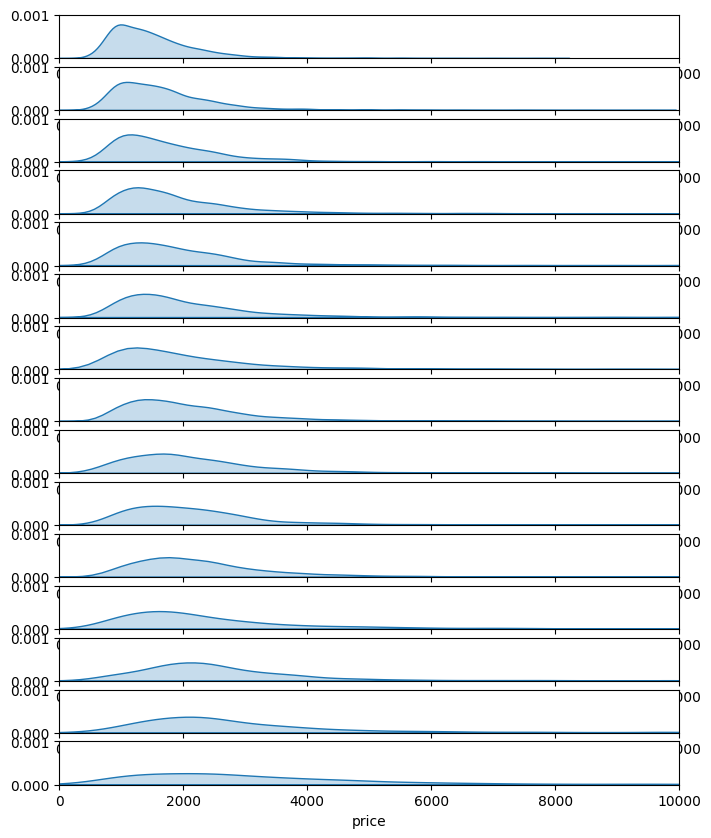

In [59]:
fig, axs = plt.subplots(nrows=15, ncols=1, figsize=(8, 10))
axs = axs.flatten() # needed to access each individual axis

# iterate over axes
words = df.sort_values('mean_price')['word'].unique().tolist()
for i, word in enumerate(words):

    # subset the data for each word
    subset = df[df['word'] == word]

    # plot the distribution of prices
    sns.kdeplot(
        subset['price'],
        shade=True,
        ax=axs[i]
    )

    # set title and labels
    axs[i].set_xlim(0, 10000)
    axs[i].set_ylim(0, 0.001)
    axs[i].set_ylabel('')

plt.show()

## Change color and remove axis

First, we add a `color` and `edgecolor` argument to the `kdeplot()` function to change the **color of the lines** and the **edge** of the area. 

Then, we **remove the axis** using `set_axis_off()`.

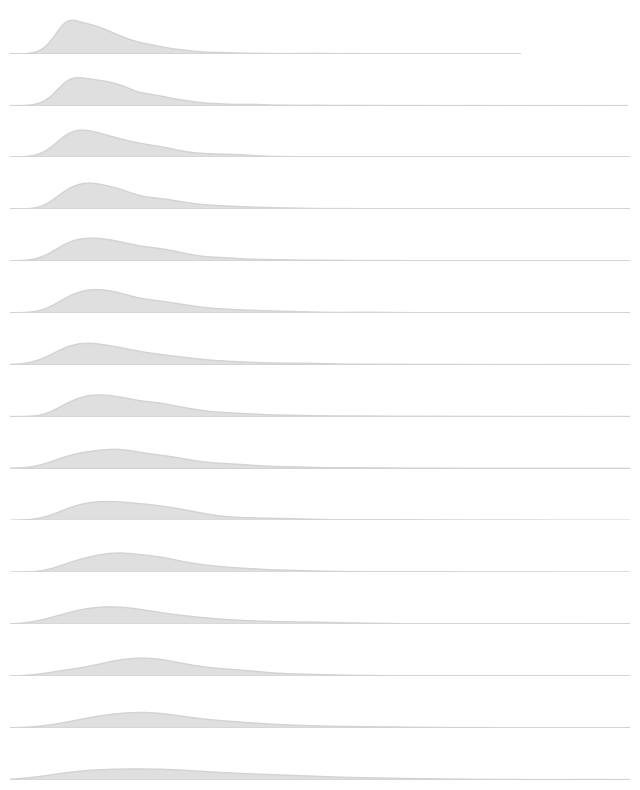

In [68]:
fig, axs = plt.subplots(nrows=15, ncols=1, figsize=(8, 10))
axs = axs.flatten() # needed to access each individual axis

# iterate over axes
words = df.sort_values('mean_price')['word'].unique().tolist()
for i, word in enumerate(words):

    # subset the data for each word
    subset = df[df['word'] == word]

    # plot the distribution of prices
    sns.kdeplot(
        subset['price'],
        shade=True,
        ax=axs[i],
        color='grey',
        edgecolor='lightgrey'
    )

    # set title and labels
    axs[i].set_xlim(0, 10000)
    axs[i].set_ylim(0, 0.001)
    axs[i].set_ylabel('')

    # remove axis
    axs[i].set_axis_off()

plt.show()

## Add median reference line and points

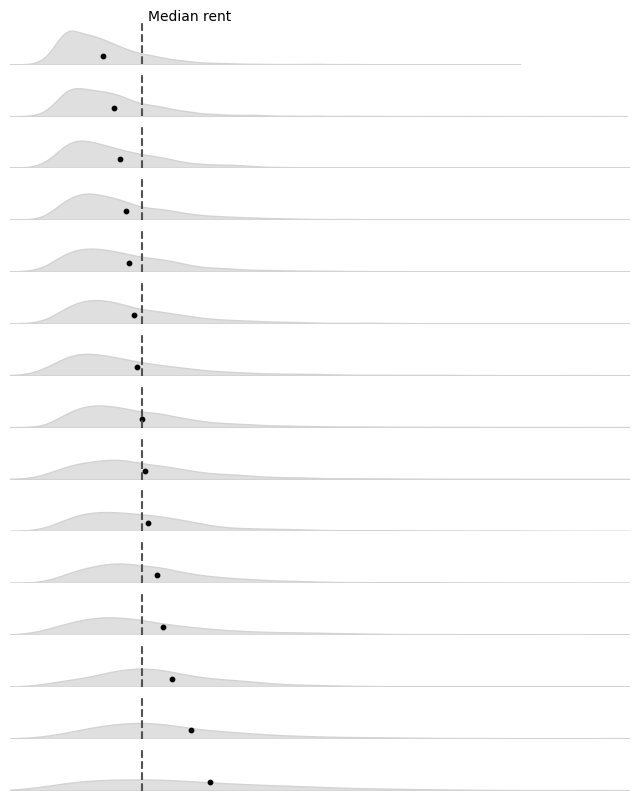

In [110]:
fig, axs = plt.subplots(nrows=15, ncols=1, figsize=(8, 10))
axs = axs.flatten() # needed to access each individual axis

# iterate over axes
words = df.sort_values('mean_price')['word'].unique().tolist()
for i, word in enumerate(words):

    # subset the data for each word
    subset = df[df['word'] == word]

    # plot the distribution of prices
    sns.kdeplot(
        subset['price'],
        shade=True,
        ax=axs[i],
        color='grey',
        edgecolor='lightgrey'
    )

    # mean value as a reference
    mean = subset['price'].mean()
    axs[i].scatter([mean], [0.0002], color='black', s=10)

    # global mean reference line
    global_mean = rent['price'].mean()
    axs[i].axvline(global_mean, color='#525252', linestyle='--')

    # set title and labels
    axs[i].set_xlim(0, 10000)
    axs[i].set_ylim(0, 0.001)
    axs[i].set_ylabel('')

    # remove axis
    axs[i].set_axis_off()

text = 'Median rent'
fig.text(
    0.35, 0.88,
    text,
    ha='center',
    fontsize=10
)

fig.savefig('../../../rent_prices.png', dpi=300)
plt.show()

## Quantile values on top

In order to **add quantile values** on top of the plot, we need to:

- calculate the **quantile values** for each word with `np.percentile()`
- define a **list of colors** that will be used to fill the space between them
- use the `fill_between()` function with coordinates and colors to **fill the space**

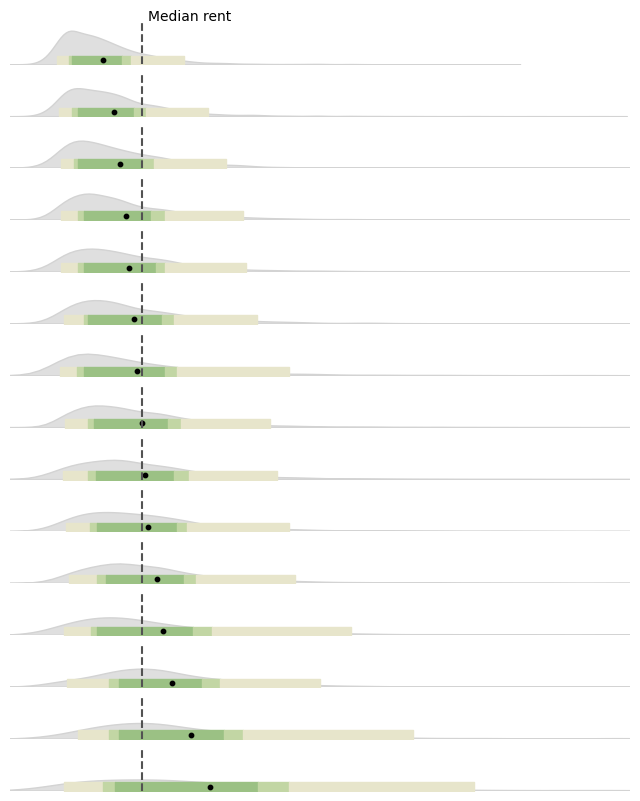

In [128]:
darkgreen = '#9BC184'
midgreen = '#C2D6A4'
lowgreen = '#E7E5CB'
colors = [lowgreen, midgreen, darkgreen, midgreen, lowgreen]

fig, axs = plt.subplots(nrows=15, ncols=1, figsize=(8, 10))
axs = axs.flatten() # needed to access each individual axis

# iterate over axes
words = df.sort_values('mean_price')['word'].unique().tolist()
for i, word in enumerate(words):

    # subset the data for each word
    subset = df[df['word'] == word]

    # plot the distribution of prices
    sns.kdeplot(
        subset['price'],
        shade=True,
        ax=axs[i],
        color='grey',
        edgecolor='lightgrey'
    )

    # global mean reference line
    global_mean = rent['price'].mean()
    axs[i].axvline(global_mean, color='#525252', linestyle='--')

    # compute quantiles
    quantiles = np.percentile(subset['price'], [5, 20, 25, 75, 80, 95])
    quantiles = quantiles.tolist()

    # fill space between each pair of quantiles
    for j in range(len(quantiles) - 1):
        axs[i].fill_between(
            [quantiles[j], # lower bound
             quantiles[j+1]], # upper bound
            0, # max y=0
            0.0002, # max y=0.0002
            color=colors[j]
        )

    # mean value as a reference
    mean = subset['price'].mean()
    axs[i].scatter([mean], [0.0001], color='black', s=10)

    # set title and labels
    axs[i].set_xlim(0, 10000)
    axs[i].set_ylim(0, 0.001)
    axs[i].set_ylabel('')

    # remove axis
    axs[i].set_axis_off()

text = 'Median rent'
fig.text(
    0.35, 0.88,
    text,
    ha='center',
    fontsize=10
)

fig.savefig('../../../rent_prices.png', dpi=300)
plt.show()

# TODO

# CHANGER LES VALEURS QUI DÉFINISSENT LES QUANTILES

# SHIFTER LEGEREMENT VERS LE BAS LES STACKED BARPLOT

# AJOUTER LES ANNOTATIONS

## Annotations

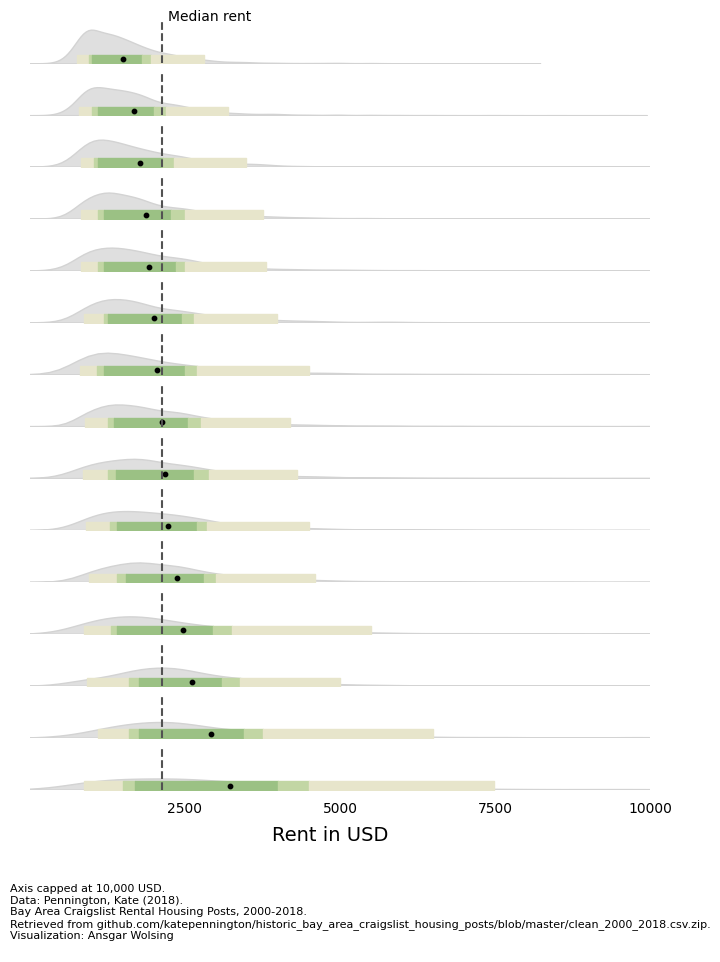

In [147]:
darkgreen = '#9BC184'
midgreen = '#C2D6A4'
lowgreen = '#E7E5CB'
colors = [lowgreen, midgreen, darkgreen, midgreen, lowgreen]

fig, axs = plt.subplots(nrows=15, ncols=1, figsize=(8, 10))
axs = axs.flatten() # needed to access each individual axis

# iterate over axes
words = df.sort_values('mean_price')['word'].unique().tolist()
for i, word in enumerate(words):

    # subset the data for each word
    subset = df[df['word'] == word]

    # plot the distribution of prices
    sns.kdeplot(
        subset['price'],
        shade=True,
        ax=axs[i],
        color='grey',
        edgecolor='lightgrey'
    )

    # global mean reference line
    global_mean = rent['price'].mean()
    axs[i].axvline(global_mean, color='#525252', linestyle='--')

    # compute quantiles
    quantiles = np.percentile(subset['price'], [5, 20, 25, 75, 80, 95])
    quantiles = quantiles.tolist()

    # fill space between each pair of quantiles
    for j in range(len(quantiles) - 1):
        axs[i].fill_between(
            [quantiles[j], # lower bound
             quantiles[j+1]], # upper bound
            0, # max y=0
            0.0002, # max y=0.0002
            color=colors[j]
        )

    # mean value as a reference
    mean = subset['price'].mean()
    axs[i].scatter([mean], [0.0001], color='black', s=10)

    # set title and labels
    axs[i].set_xlim(0, 10000)
    axs[i].set_ylim(0, 0.001)
    axs[i].set_ylabel('')

    # x axis scale for last ax
    if i == 14:
        values = [2500, 5000, 7500, 10000]
        for value in values:
            axs[i].text(
                value, -0.0005,
                f'{value}',
                ha='center',
                fontsize=10
            )

    # remove axis
    axs[i].set_axis_off()

text = 'Median rent'
fig.text(
    0.35, 0.88,
    text,
    ha='center',
    fontsize=10
)

# credit
text = """
Axis capped at 10,000 USD.
Data: Pennington, Kate (2018). 
Bay Area Craigslist Rental Housing Posts, 2000-2018.
Retrieved from github.com/katepennington/historic_bay_area_craigslist_housing_posts/blob/master/clean_2000_2018.csv.zip.
Visualization: Ansgar Wolsing
"""
fig.text(
    0.1, -0.05,
    text,
    ha='left',
    fontsize=8
)

# x axis label
text = "Rent in USD"
fig.text(
    0.5, 0.06,
    text,
    ha='center',
    fontsize=14
)

plt.savefig('../../../rent_prices.png', dpi=300, bbox_inches='tight')
plt.show()

In [37]:
df_for_legend = rent_words[rent_words['word']=='beautiful']
df_for_legend

,post_id,year,price,beds,word
271,pre2013_131819,2004,1550,1.0,beautiful
296,pre2013_45616,2011,1195,1.0,beautiful
380,6368525767,2017,2195,2.0,beautiful
431,5247446875,2015,4200,3.0,beautiful
468,6488646647,2018,4888,4.0,beautiful
...,...,...,...,...,...
1641620,pre2013_111318,2004,1100,1.0,beautiful
1641641,pre2013_107846,2004,7000,4.0,beautiful
1641783,pre2013_9107,2011,5500,4.0,beautiful
1641913,5719545779,2016,2500,2.0,beautiful


## Going further

This article explains how to reproduce a [line chart](https://python-graph-gallery.com/line-chart/) with small multiples, originally design by Gilbert Fontana. 

For more examples of **advanced customization**, check out this [other reproduction of Fontana](https://python-graph-gallery.com/web-stacked-line-chart-with-labels/)'s work. Also, you might be interested in [adding an image/logo](https://python-graph-gallery.com/513-add-logo-matplotlib/) to your chart. 